# AIN 214 PA3 on Data Prepocessing and Regression

# THE STUDENT INFO
## Student Name: Abdulkadir Parlak
## Student ID: 2210765025

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder


# Load the dataset
# Replace 'path_to_dataset' with the actual file path
path_to_dataset = 'housing.csv'
housing_df = pd.read_csv(path_to_dataset)

# We will deal with the famous California Housing Prices dataset from Kaggle. [1]

# 1. Data Preprocessing (50 Pts)

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [2]:
# checking for missing values
housing_df.isnull().sum()
# only total_bedrooms feature has some missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
# drop the rows with missing values before EDA
cleaned_df = housing_df.dropna()
cleaned_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Distributions of Features

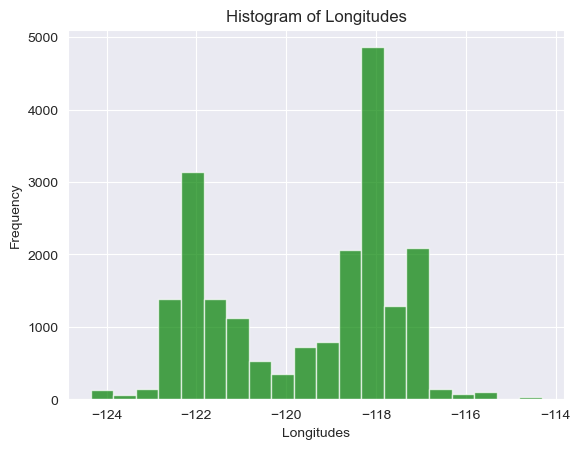

In [4]:
# distribution of "longitude" feature

# since longitude is a numerical value, histogram is suitable to visualize
plt.hist(cleaned_df['longitude'], bins=20, color='green', alpha=0.7)
plt.xlabel('Longitudes')
plt.ylabel('Frequency')
plt.title('Histogram of Longitudes')
plt.show()
# Longitude values seem to cluster into two groups

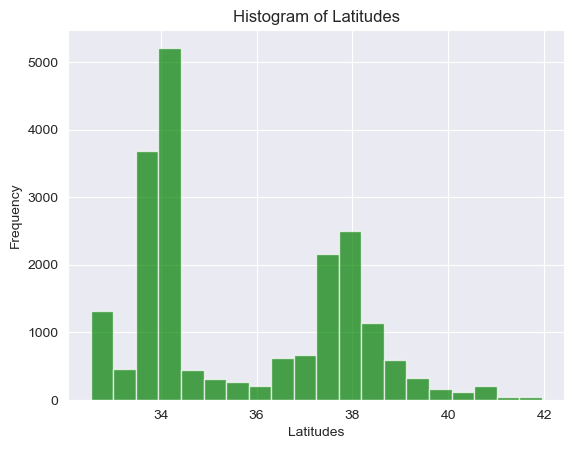

In [5]:
# distribution of "latitude" feature

# since latitude is a numerical value, histogram is suitable to visualize
plt.hist(cleaned_df['latitude'], bins=20, color='green', alpha=0.7)
plt.xlabel('Latitudes')
plt.ylabel('Frequency')
plt.title('Histogram of Latitudes')
plt.show()
# Longitude values seem to cluster into two groups, but it contains a lot of outliers

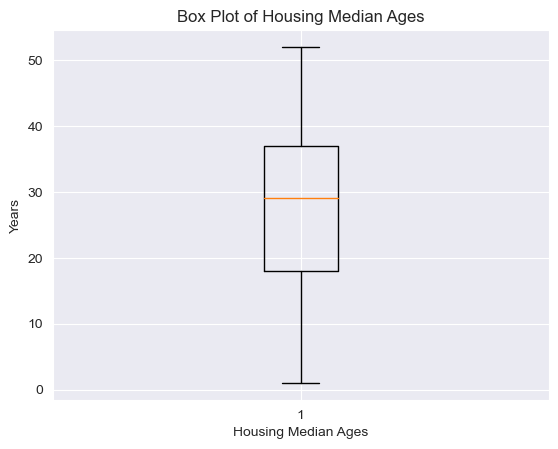

In [6]:
# distribution of "housing_median_age" feature

# plotting box plot
plt.boxplot(cleaned_df['housing_median_age'])
plt.xlabel('Housing Median Ages')
plt.ylabel('Years')
plt.title('Box Plot of Housing Median Ages')
plt.show()
# It doesn't seem the housing median age feature has many outliers. It looks like a normal distribution.

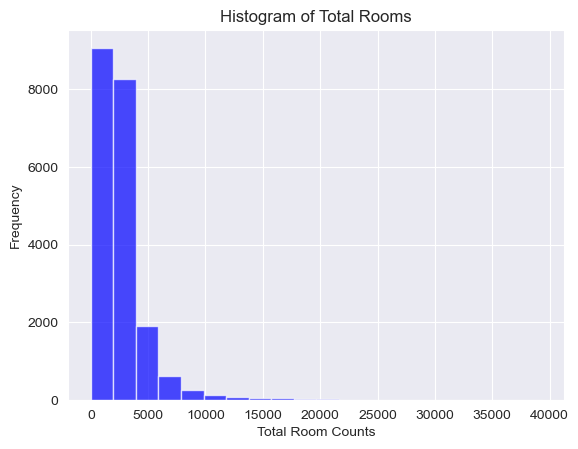

7

In [7]:
#distribution of "total_rooms" feature
# histogram is appropriate
plt.hist(cleaned_df['total_rooms'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Total Room Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rooms')
plt.show()

cleaned_df['total_rooms'][cleaned_df['total_rooms'] > 30000].count()# there are outliers
# because of outliers we cannot see the exact distribution of the feature

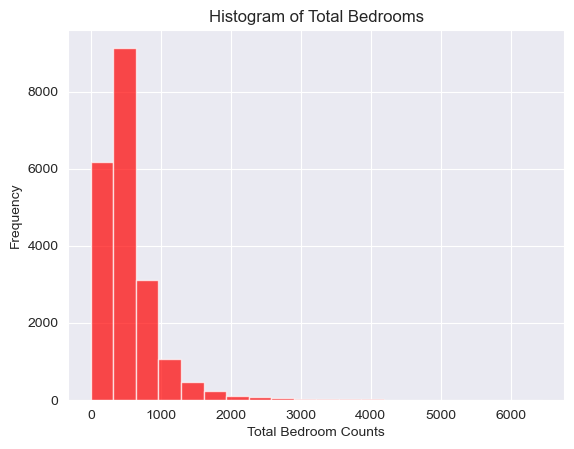

In [8]:
#distribution of "total_bedrooms" feature
# again histogram is a good choice
plt.hist(cleaned_df['total_bedrooms'], bins=20, color='red', alpha=0.7)
plt.xlabel('Total Bedroom Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bedrooms')
plt.show()

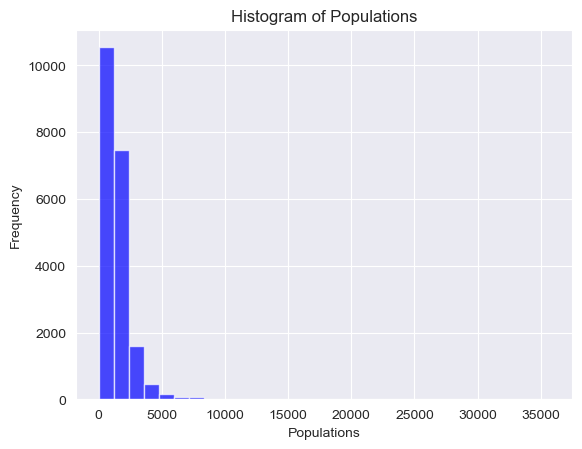

In [9]:
# distribution of "population" feature
# plotting histogram plot
plt.hist(cleaned_df['population'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Populations')
plt.ylabel('Frequency')
plt.title('Histogram of Populations')
plt.show()

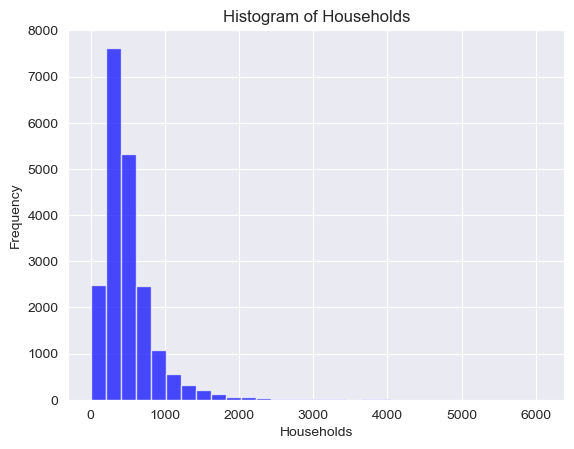

In [10]:
#distribution of "households" feature
# plotting histogram plot
plt.hist(cleaned_df['households'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Households')
plt.ylabel('Frequency')
plt.title('Histogram of Households')
plt.show()

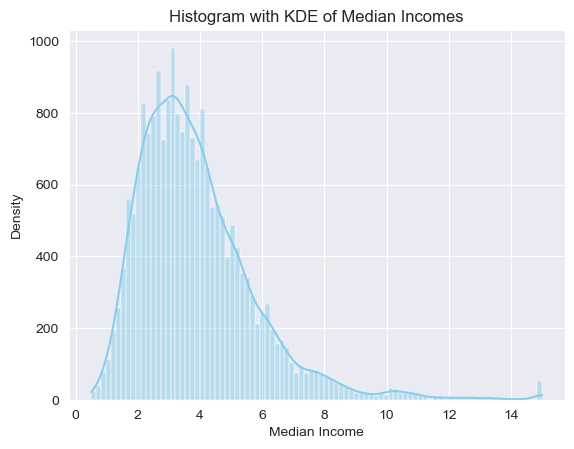

In [11]:
# Distribution of "median_income" feature

# plotting kde graph using seaborn
sns.histplot(cleaned_df['median_income'], kde=True, color='skyblue')
plt.title('Histogram with KDE of Median Incomes')
plt.xlabel('Median Income')
plt.ylabel('Density')
plt.show()

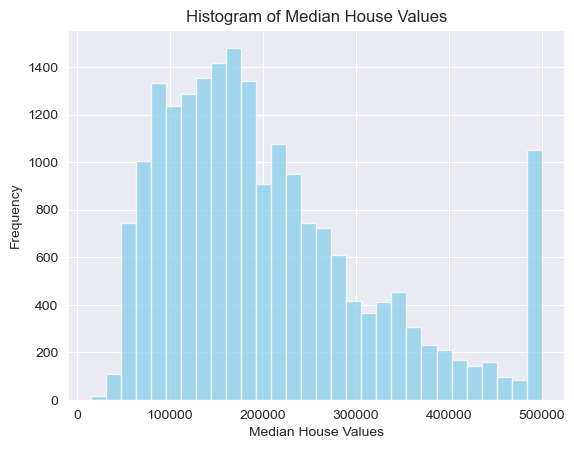

In [12]:
# distribution of "median_house_value" variable (it is also the target variable in this dataset)
# plotting histogram plot
plt.hist(cleaned_df['median_house_value'], bins=30, color='skyblue', alpha=0.75)
plt.xlabel('Median House Values')
plt.ylabel('Frequency')
plt.title('Histogram of Median House Values')
plt.show()
# there are clustering around 10k to 30k, and also I see a relative peak at around 50k

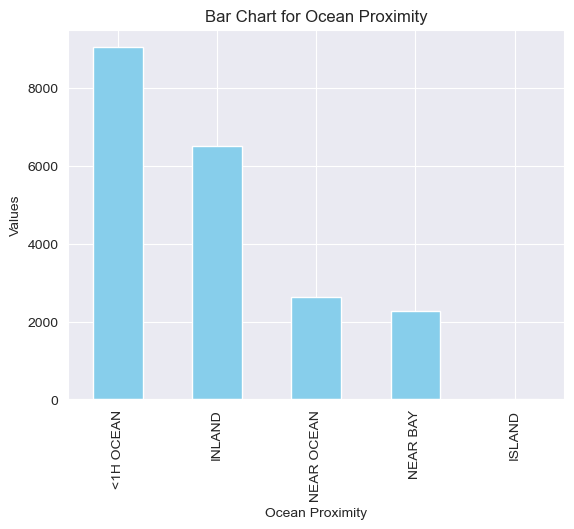

In [13]:
#distribution of "ocean proximity" feature

# how many occurrences of each category
category_counts = cleaned_df['ocean_proximity'].value_counts()

# plotting a bar chart
category_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart for Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Values')
plt.show()
# ISLAND has the least occurrences in the dataset(almost none)

# Visualizing the target variable with respect to some features

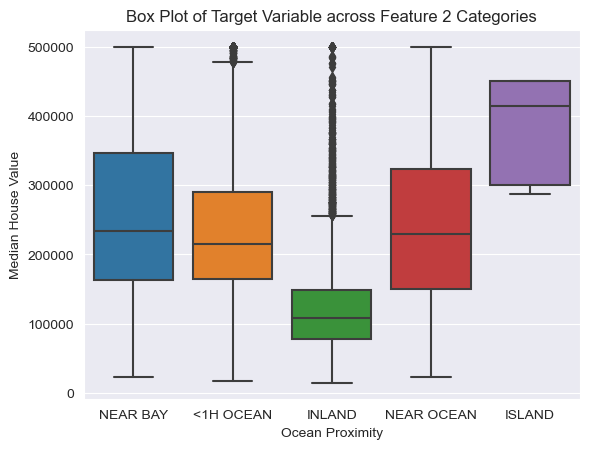

In [14]:
# categorical feature (ocean_proximity)
# Box plot for the categorical feature
sns.boxplot(x='ocean_proximity', y='median_house_value', data=cleaned_df)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Box Plot of Target Variable across Feature 2 Categories')
plt.show()

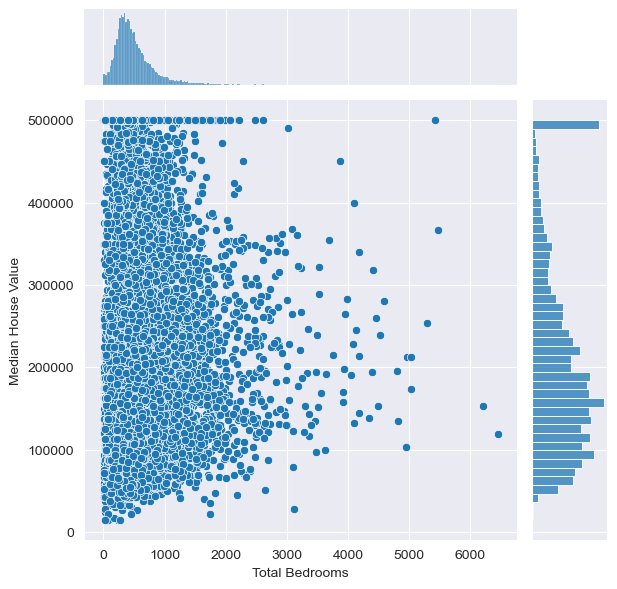

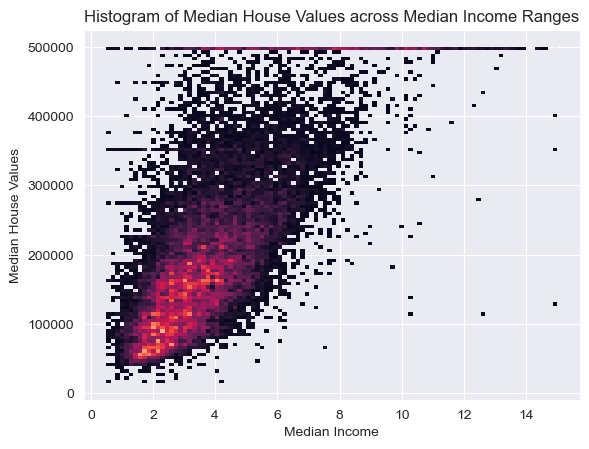

In [15]:
# numerical features (total_rooms, median_income)

# for total_rooms
# Plotting joint plot 
sns.jointplot(x='total_bedrooms', y='median_house_value', data=cleaned_df, kind='scatter')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')
plt.show()

# for median_income
# histogram for a continuous feature(median_income)
sns.histplot(x='median_income', y='median_house_value', data=cleaned_df, bins=100, cmap='rocket')
plt.xlabel('Median Income')
plt.ylabel('Median House Values')
plt.title('Histogram of Median House Values across Median Income Ranges')
plt.show()

# As far as I understood, the target variable(median_house_value) is restricted to be at most 50k
# because some values seem to be over 50k, but they could not exceed the 50k limit.

# Visualize the correlation between features using a heatmap

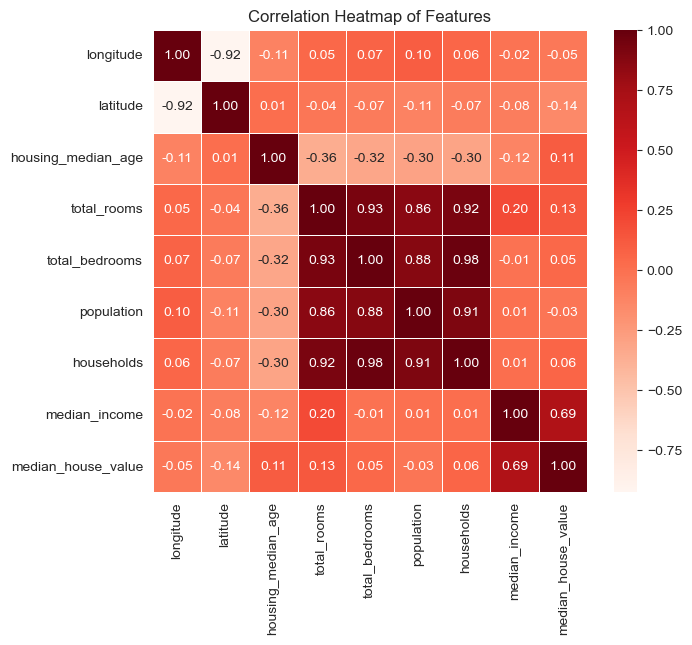

In [16]:
# select only numerical features
df_numerical = cleaned_df.select_dtypes(include='number')

# we have to calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# create the heatmap (only numerical values)
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Comments:
# There is strong positive correlation between households and total_bedrooms/total_rooms (as expected).
# Also,e is a weak correlation between median_income and longitude.
# There is a strong inverse correlation between latitude and longitude features.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [17]:
# I choose IQR method to detect outliers: Firstly, calculating the first quartile(Q1) and 3rd quartile(Q3).
# After subtracting Q1 from Q3, IQR equals to that result (IQR = Q3 - Q1)
# And the values below (Q1 - 1.5*IQR) and above (Q3 + 1.5*IQR) are considered as mild outliers.
# Additionally, the values below (Q1 - 3*IQR) and above (Q3 + 3*IQR) are considered as extreme outliers.

In [18]:
# outlier detection for "longitude" feature
Q1 = cleaned_df['longitude'].quantile(0.25)
Q3 = cleaned_df['longitude'].quantile(0.75)
IQR = Q3 - Q1
longitude_outliers = (cleaned_df['longitude'] < (Q1 - 1.5 * IQR)) | (cleaned_df['longitude'] > (Q3 + 1.5 * IQR))
cleaned_df['longitude'][longitude_outliers].count()

0

In [19]:
# outlier detection for "latitude" feature
Q1 = cleaned_df['latitude'].quantile(0.25)
Q3 = cleaned_df['latitude'].quantile(0.75)
IQR = Q3 - Q1
latitude_outliers = (cleaned_df['latitude'] < (Q1 - 1.5 * IQR)) | (cleaned_df['latitude'] > (Q3 + 1.5 * IQR))
cleaned_df['latitude'][latitude_outliers].count()

0

In [20]:
# outlier detection for "housing_median_age" feature
Q1 = cleaned_df['housing_median_age'].quantile(0.25)
Q3 = cleaned_df['housing_median_age'].quantile(0.75)
IQR = Q3 - Q1
housing_median_age_outliers = ((cleaned_df['housing_median_age'] < (Q1 - 1.5 * IQR)) |
                               (cleaned_df['housing_median_age'] > (Q3 + 1.5 * IQR)))
cleaned_df['housing_median_age'][housing_median_age_outliers].count()

0

In [21]:
# outlier detection for "total_rooms" feature
Q1 = cleaned_df['total_rooms'].quantile(0.25)
Q3 = cleaned_df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1
total_rooms_outliers = (cleaned_df['total_rooms'] < (Q1 - 1.5 * IQR)) | (cleaned_df['total_rooms'] > (Q3 + 1.5 * IQR))
cleaned_df['total_rooms'][total_rooms_outliers].count()

1290

In [22]:
# outlier detection for "total_bedrooms" feature
Q1 = cleaned_df['total_bedrooms'].quantile(0.25)
Q3 = cleaned_df['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1
total_bedrooms_outliers = ((cleaned_df['total_bedrooms'] < (Q1 - 1.5 * IQR)) |
                           (cleaned_df['total_bedrooms'] > (Q3 + 1.5 * IQR)))
cleaned_df['total_bedrooms'][total_bedrooms_outliers].count()

1271

In [23]:
# outlier detection for "population" feature
Q1 = cleaned_df['population'].quantile(0.25)
Q3 = cleaned_df['population'].quantile(0.75)
IQR = Q3 - Q1
population_outliers = (cleaned_df['population'] < (Q1 - 1.5 * IQR)) | (cleaned_df['population'] > (Q3 + 1.5 * IQR))
cleaned_df['population'][population_outliers].count()

1190

In [24]:
# outlier detection for "households" feature
Q1 = cleaned_df['households'].quantile(0.25)
Q3 = cleaned_df['households'].quantile(0.75)
IQR = Q3 - Q1
households_outliers = (cleaned_df['households'] < (Q1 - 1.5 * IQR)) | (cleaned_df['households'] > (Q3 + 1.5 * IQR))
cleaned_df['households'][households_outliers].count()

1210

In [25]:
# outlier detection for "median_income" feature
Q1 = cleaned_df['median_income'].quantile(0.25)
Q3 = cleaned_df['median_income'].quantile(0.75)
IQR = Q3 - Q1
median_income_outliers = ((cleaned_df['median_income'] < (Q1 - 1.5 * IQR)) |
                          (cleaned_df['median_income'] > (Q3 + 1.5 * IQR)))
cleaned_df['median_income'][median_income_outliers].count()

670

## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

# Keep the dataset as is (no operations applied)

In [26]:
checkpoint1_df = cleaned_df.copy() # deep copy of the original df (checkpoint)

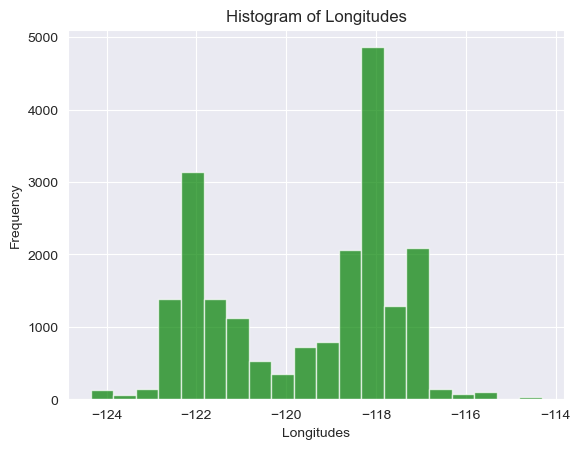

In [27]:
#distribution of "longitude" feature

# since longitude is a numerical value, histogram is suitable to visualize
plt.hist(checkpoint1_df['longitude'], bins=20, color='green', alpha=0.7)
plt.xlabel('Longitudes')
plt.ylabel('Frequency')
plt.title('Histogram of Longitudes')
plt.show()
# Longitude values seem to cluster into two groups

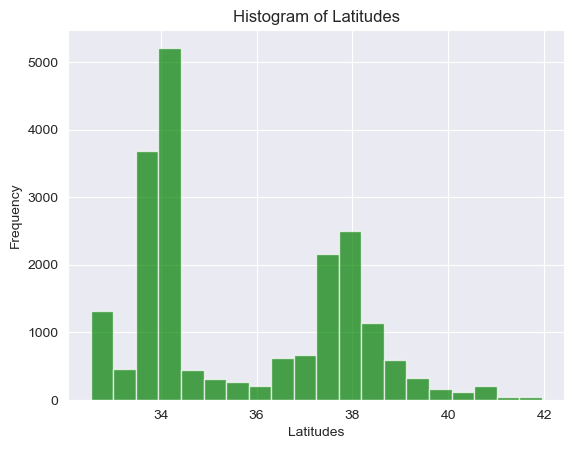

In [28]:
# distribution of "latitude" feature

# since latitude is a numerical value, histogram is suitable to visualize
plt.hist(checkpoint1_df['latitude'], bins=20, color='green', alpha=0.7)
plt.xlabel('Latitudes')
plt.ylabel('Frequency')
plt.title('Histogram of Latitudes')
plt.show()

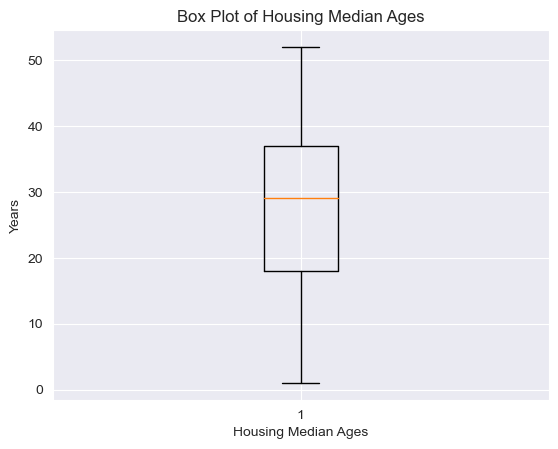

In [29]:
# distribution of "housing_median_age" feature

# plotting box plot
plt.boxplot(checkpoint1_df['housing_median_age'])
plt.xlabel('Housing Median Ages')
plt.ylabel('Years')
plt.title('Box Plot of Housing Median Ages')
plt.show()

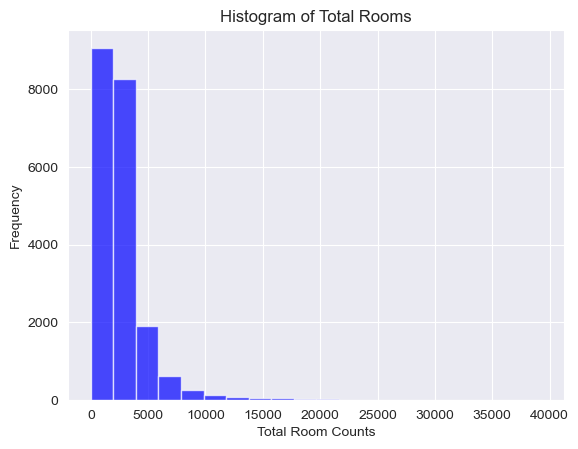

In [30]:
#distribution of "total_rooms" feature
# histogram is appropriate
plt.hist(checkpoint1_df['total_rooms'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Total Room Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rooms')
plt.show()

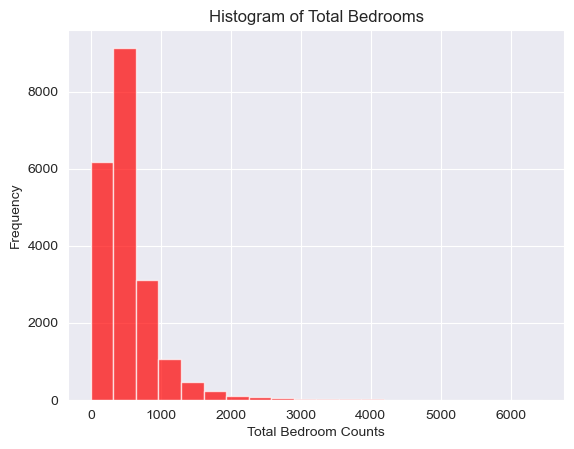

In [31]:
#distribution of "total_bedrooms" feature
# again histogram is a good choice
plt.hist(checkpoint1_df['total_bedrooms'], bins=20, color='red', alpha=0.7)
plt.xlabel('Total Bedroom Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bedrooms')
plt.show()

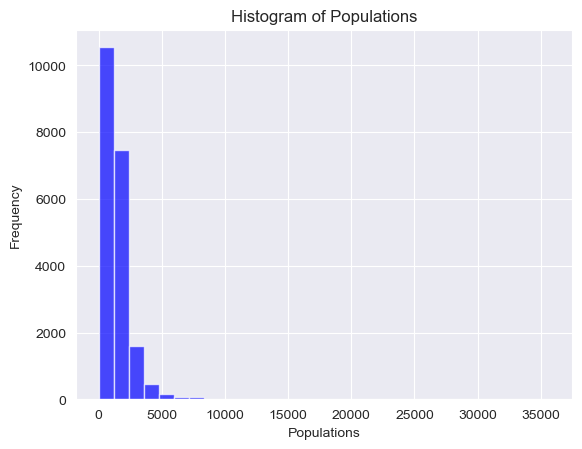

In [32]:
# distribution of "population" feature
# plotting histogram plot
plt.hist(checkpoint1_df['population'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Populations')
plt.ylabel('Frequency')
plt.title('Histogram of Populations')
plt.show()

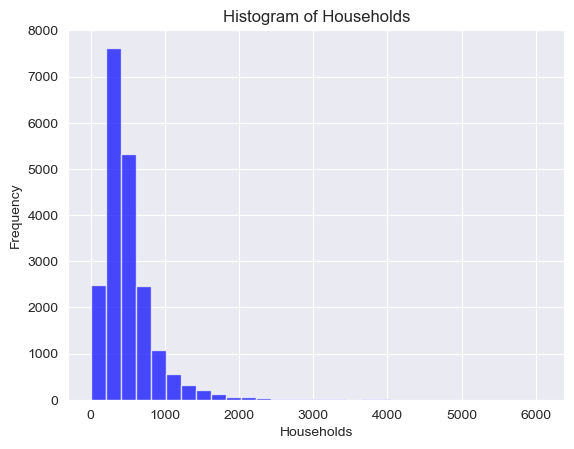

In [33]:
#distribution of "households" feature
# plotting histogram plot
plt.hist(checkpoint1_df['households'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Households')
plt.ylabel('Frequency')
plt.title('Histogram of Households')
plt.show()

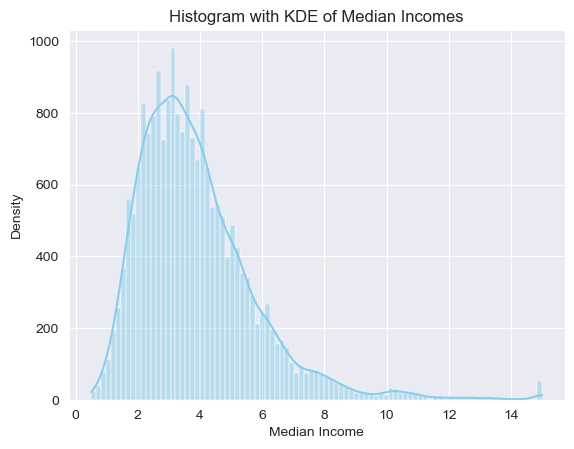

In [34]:
# Distribution of "median_income" feature

# plotting kde graph using seaborn
sns.histplot(checkpoint1_df['median_income'], kde=True, color='skyblue')
plt.title('Histogram with KDE of Median Incomes')
plt.xlabel('Median Income')
plt.ylabel('Density')
plt.show()

# Outlier removal

In [35]:
checkpoint2_df = cleaned_df.copy() # deep copy of the original df (checkpoint) 

In [36]:
# outlier removal
combined_condition = longitude_outliers | latitude_outliers | housing_median_age_outliers | total_rooms_outliers | total_bedrooms_outliers | population_outliers | households_outliers | median_income_outliers

checkpoint2_df = checkpoint2_df[~combined_condition]

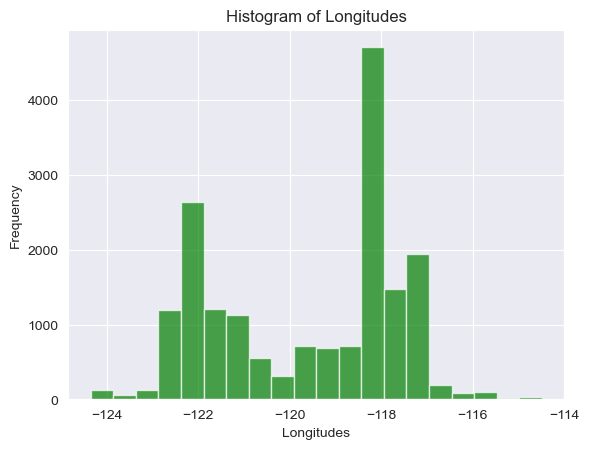

In [37]:
#distribution of "longitude" feature

# since longitude is a numerical value, histogram is suitable to visualize
plt.hist(checkpoint2_df['longitude'], bins=20, color='green', alpha=0.7)
plt.xlabel('Longitudes')
plt.ylabel('Frequency')
plt.title('Histogram of Longitudes')
plt.show()

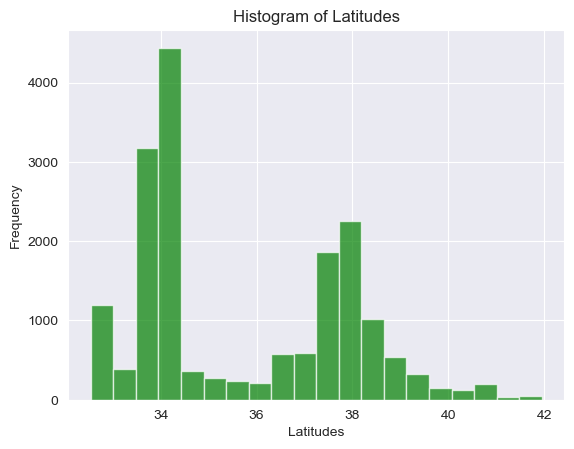

In [38]:
# distribution of "latitude" feature

# since latitude is a numerical value, histogram is suitable to visualize
plt.hist(checkpoint2_df['latitude'], bins=20, color='green', alpha=0.7)
plt.xlabel('Latitudes')
plt.ylabel('Frequency')
plt.title('Histogram of Latitudes')
plt.show()

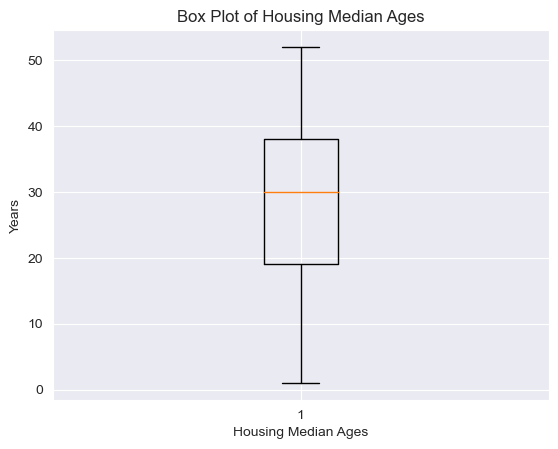

In [39]:
# distribution of "housing_median_age" feature

# plotting box plot
plt.boxplot(checkpoint2_df['housing_median_age'])
plt.xlabel('Housing Median Ages')
plt.ylabel('Years')
plt.title('Box Plot of Housing Median Ages')
plt.show()

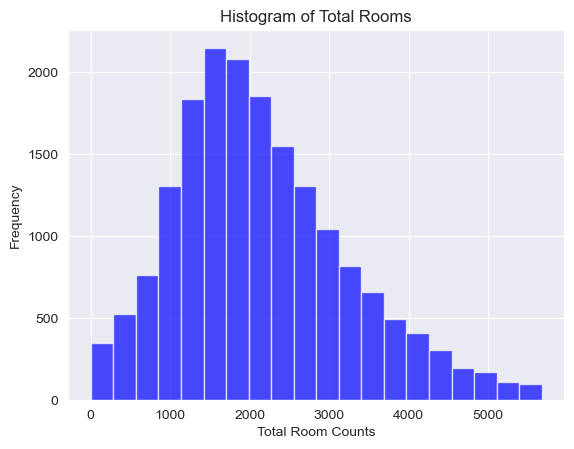

0

In [40]:
#distribution of "total_rooms" feature
# histogram is appropriate
plt.hist(checkpoint2_df['total_rooms'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Total Room Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rooms')
plt.show()
checkpoint2_df['total_rooms'][total_rooms_outliers].count()

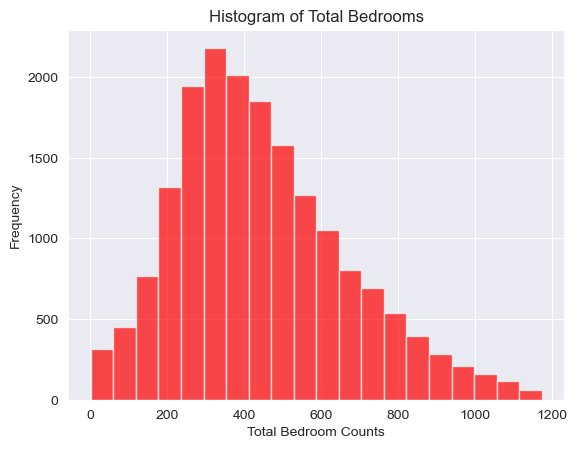

0

In [41]:
#distribution of "total_bedrooms" feature
# again histogram is a good choice
plt.hist(checkpoint2_df['total_bedrooms'], bins=20, color='red', alpha=0.7)
plt.xlabel('Total Bedroom Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bedrooms')
plt.show()
checkpoint2_df['total_bedrooms'][total_bedrooms_outliers].count()

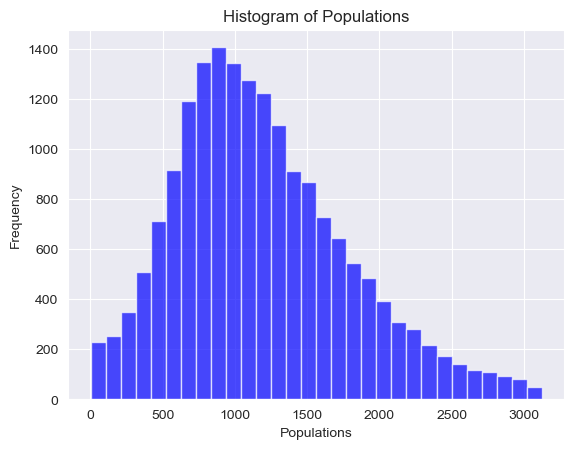

0

In [42]:
# distribution of "population" feature
# plotting histogram plot
plt.hist(checkpoint2_df['population'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Populations')
plt.ylabel('Frequency')
plt.title('Histogram of Populations')
plt.show()
checkpoint2_df['population'][population_outliers].count()

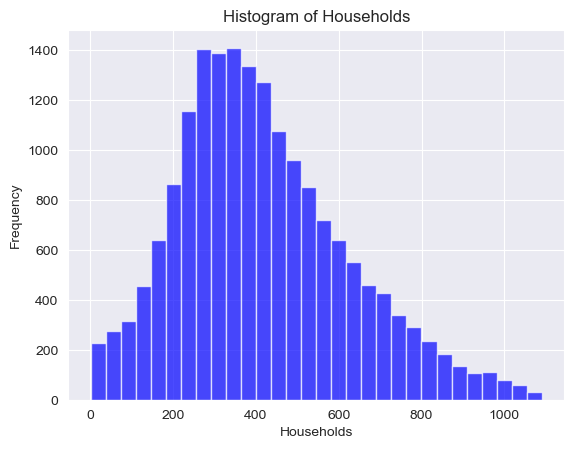

In [43]:
#distribution of "households" feature
# plotting histogram plot
plt.hist(checkpoint2_df['households'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Households')
plt.ylabel('Frequency')
plt.title('Histogram of Households')
plt.show()

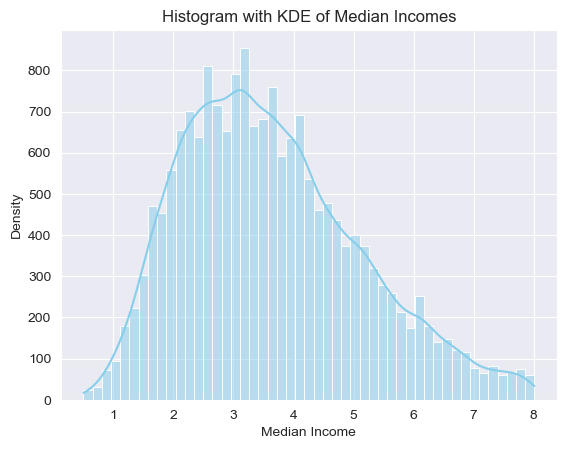

In [44]:
# Distribution of "median_income" feature
# plotting kde graph using seaborn
sns.histplot(checkpoint2_df['median_income'], kde=True, color='skyblue')
plt.title('Histogram with KDE of Median Incomes')
plt.xlabel('Median Income')
plt.ylabel('Density')
plt.show()

# Mean Imputation 

In [45]:
checkpoint3_df = cleaned_df.copy() # deep copy of the original df (checkpoint) 

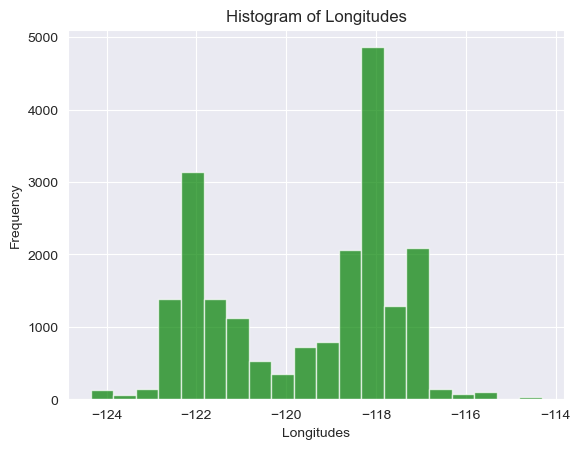

In [46]:
mean_value = cleaned_df['longitude'].mean() # calculating the mean
checkpoint3_df.loc[longitude_outliers, 'longitude'] = mean_value # impute the outliers with mean

#distribution of "longitude" feature

# since longitude is a numerical value, histogram is suitable to visualize
plt.hist(checkpoint3_df['longitude'], bins=20, color='green', alpha=0.7)
plt.xlabel('Longitudes')
plt.ylabel('Frequency')
plt.title('Histogram of Longitudes')
plt.show()

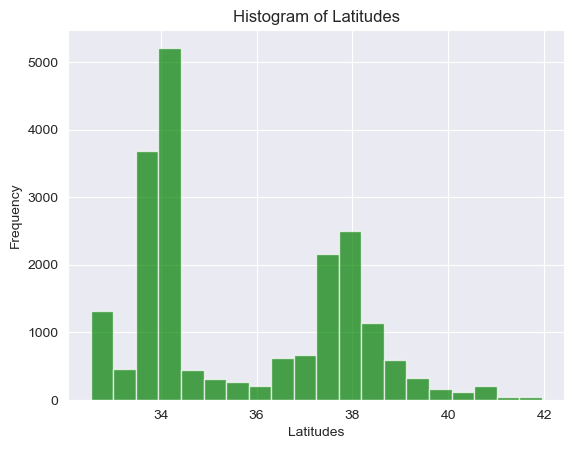

In [47]:
mean_value = cleaned_df['latitude'].mean() # calculating the mean
checkpoint3_df.loc[latitude_outliers, 'latitude'] = mean_value # impute the outliers with mean

# distribution of "latitude" feature

# since latitude is a numerical value, histogram is suitable to visualize
plt.hist(checkpoint3_df['latitude'], bins=20, color='green', alpha=0.7)
plt.xlabel('Latitudes')
plt.ylabel('Frequency')
plt.title('Histogram of Latitudes')
plt.show()

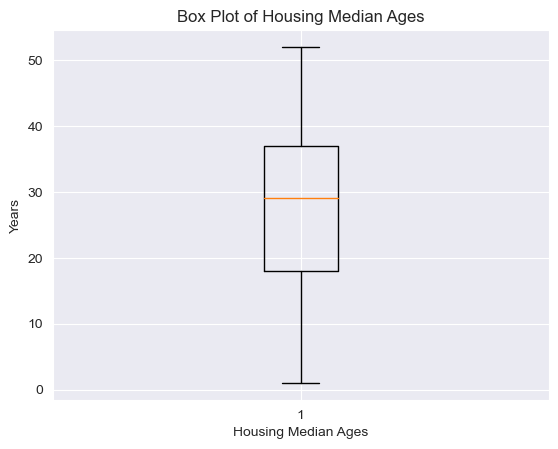

In [48]:
mean_value = cleaned_df['housing_median_age'].mean() # calculating the mean
checkpoint3_df.loc[housing_median_age_outliers, 'housing_median_age'] = mean_value # impute the outliers with mean

# distribution of "housing_median_age" feature

# plotting box plot
plt.boxplot(checkpoint3_df['housing_median_age'])
plt.xlabel('Housing Median Ages')
plt.ylabel('Years')
plt.title('Box Plot of Housing Median Ages')
plt.show()

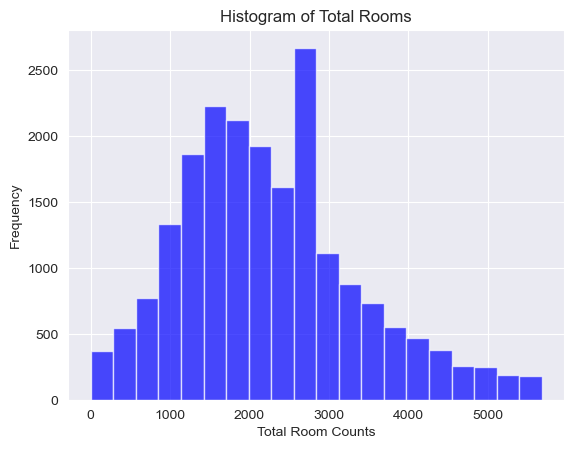

In [49]:
mean_value = cleaned_df['total_rooms'].mean() # calculating the mean
checkpoint3_df.loc[total_rooms_outliers, 'total_rooms'] = mean_value # impute the outliers with mean

#distribution of "total_rooms" feature
# histogram is appropriate
plt.hist(checkpoint3_df['total_rooms'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Total Room Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rooms')
plt.show()

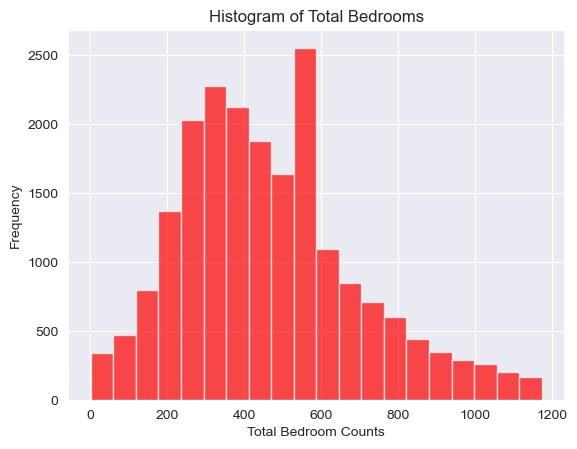

In [50]:
mean_value = cleaned_df['total_bedrooms'].mean() # calculating the mean
checkpoint3_df.loc[total_bedrooms_outliers, 'total_bedrooms'] = mean_value # impute the outliers with mean

#distribution of "total_bedrooms" feature
# again histogram is a good choice
plt.hist(checkpoint3_df['total_bedrooms'], bins=20, color='red', alpha=0.7)
plt.xlabel('Total Bedroom Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bedrooms')
plt.show()

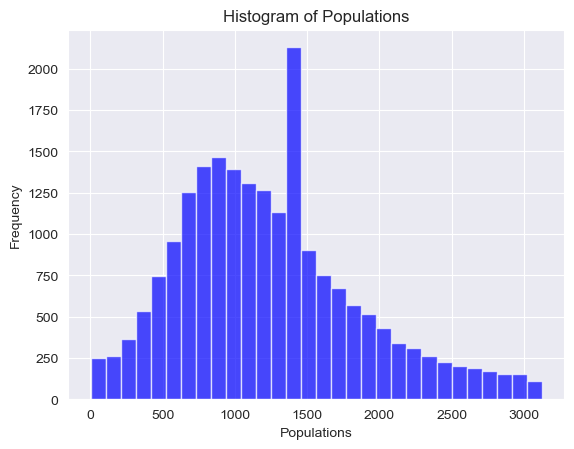

In [51]:
mean_value = cleaned_df['population'].mean() # calculating the mean
checkpoint3_df.loc[population_outliers, 'population'] = mean_value # impute the outliers with mean

# distribution of "population" feature
# plotting histogram plot
plt.hist(checkpoint3_df['population'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Populations')
plt.ylabel('Frequency')
plt.title('Histogram of Populations')
plt.show()

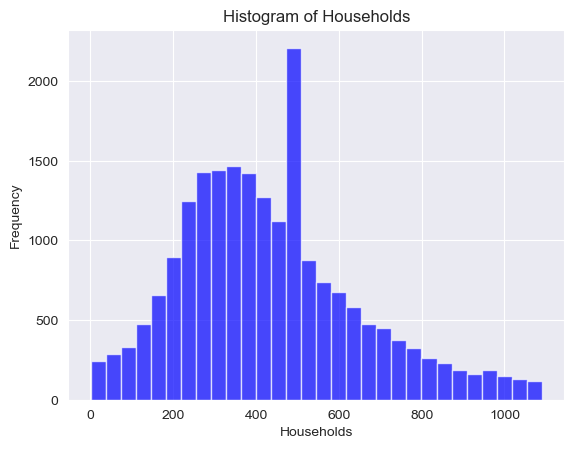

In [52]:
mean_value = cleaned_df['households'].mean() # calculating the mean
checkpoint3_df.loc[households_outliers, 'households'] = mean_value # impute the outliers with mean

#distribution of "households" feature
# plotting histogram plot
plt.hist(checkpoint3_df['households'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Households')
plt.ylabel('Frequency')
plt.title('Histogram of Households')
plt.show()

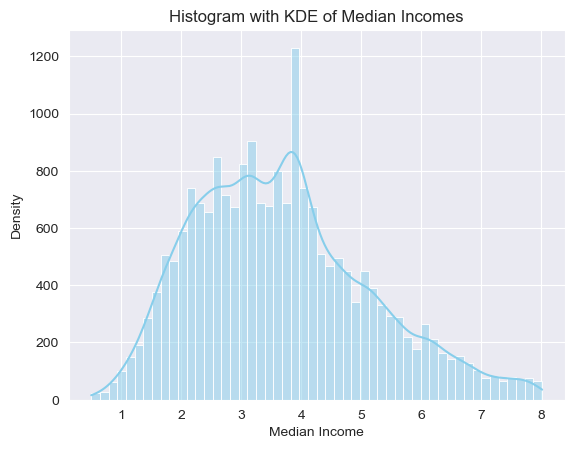

In [53]:
mean_value = cleaned_df['median_income'].mean() # calculating the mean
checkpoint3_df.loc[median_income_outliers, 'median_income'] = mean_value # impute the outliers with mean

# Distribution of "median_income" feature
# plotting kde graph using seaborn
sns.histplot(checkpoint3_df['median_income'], kde=True, color='skyblue')
plt.title('Histogram with KDE of Median Incomes')
plt.xlabel('Median Income')
plt.ylabel('Density')
plt.show()

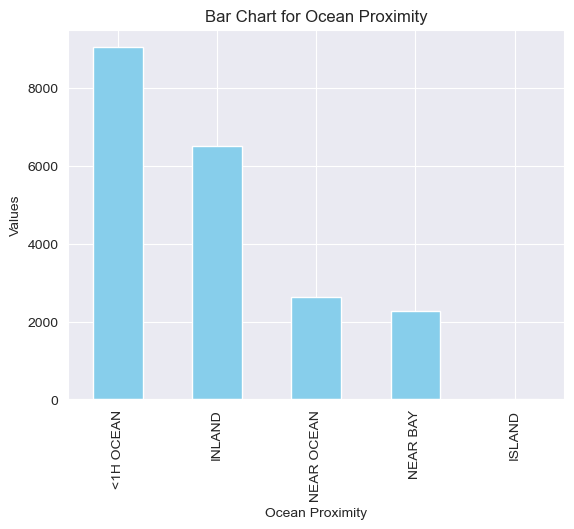

In [54]:
#mode imputation for categorical values
mode_value = cleaned_df['ocean_proximity'].mode()[0]
checkpoint3_df['ocean_proximity'] = checkpoint3_df['ocean_proximity'].fillna(mode_value)

#distribution of "ocean proximity" feature

# how many occurrences of each category
category_counts = checkpoint3_df['ocean_proximity'].value_counts()

# plotting a bar chart
category_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart for Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Values')
plt.show()

# Median Imputation

In [55]:
checkpoint4_df = cleaned_df.copy() # deep copy of the original df (checkpoint) 

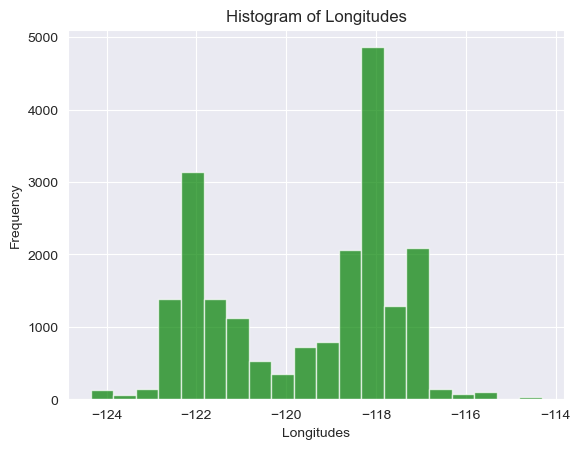

In [56]:
median_value = cleaned_df['longitude'].median() # calculating the median
checkpoint4_df.loc[longitude_outliers, 'longitude'] = median_value # impute the outliers with median

#distribution of "longitude" feature

# since longitude is a numerical value, histogram is suitable to visualize
plt.hist(checkpoint4_df['longitude'], bins=20, color='green', alpha=0.7)
plt.xlabel('Longitudes')
plt.ylabel('Frequency')
plt.title('Histogram of Longitudes')
plt.show()

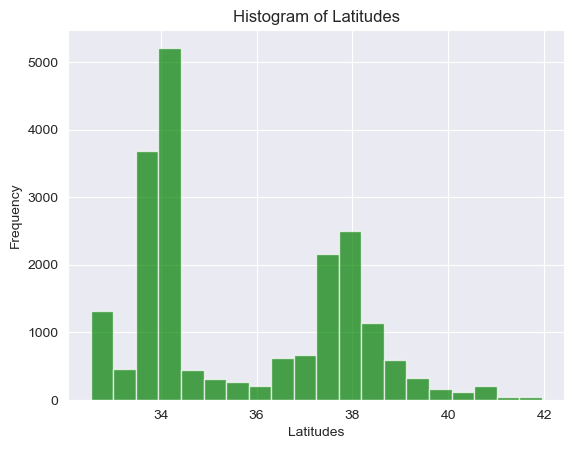

In [57]:
median_value = cleaned_df['latitude'].median()  # calculating the median
checkpoint4_df.loc[latitude_outliers, 'latitude'] = median_value  # impute the outliers with median

# distribution of "latitude" feature

# since latitude is a numerical value, histogram is suitable to visualize
plt.hist(checkpoint4_df['latitude'], bins=20, color='green', alpha=0.7)
plt.xlabel('Latitudes')
plt.ylabel('Frequency')
plt.title('Histogram of Latitudes')
plt.show()

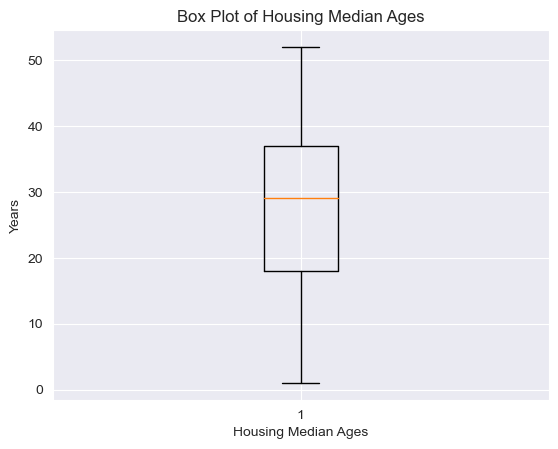

In [58]:
median_value = cleaned_df['housing_median_age'].median()  # calculating the median
checkpoint4_df.loc[housing_median_age_outliers, 'housing_median_age'] = median_value  # impute the outliers with median

# distribution of "housing_median_age" feature

# plotting box plot
plt.boxplot(checkpoint4_df['housing_median_age'])
plt.xlabel('Housing Median Ages')
plt.ylabel('Years')
plt.title('Box Plot of Housing Median Ages')
plt.show()

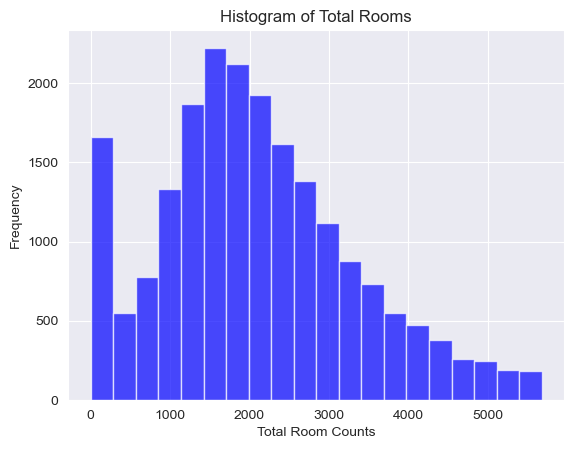

In [59]:
median_value = cleaned_df['total_rooms'].median()  # calculating the median
checkpoint4_df.loc[total_rooms_outliers, 'total_rooms'] = mean_value  # impute the outliers with median

#distribution of "total_rooms" feature
# histogram is appropriate
plt.hist(checkpoint4_df['total_rooms'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Total Room Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rooms')
plt.show()

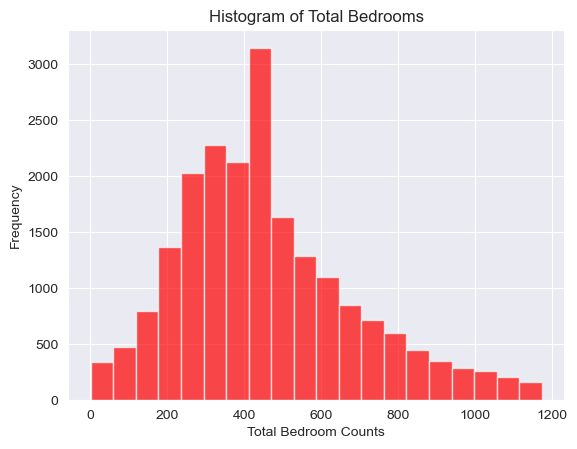

In [60]:
median_value = cleaned_df['total_bedrooms'].median()  # calculating the median
checkpoint4_df.loc[total_bedrooms_outliers, 'total_bedrooms'] = median_value  # impute the outliers with median

#distribution of "total_bedrooms" feature
# again histogram is a good choice
plt.hist(checkpoint4_df['total_bedrooms'], bins=20, color='red', alpha=0.7)
plt.xlabel('Total Bedroom Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bedrooms')
plt.show()

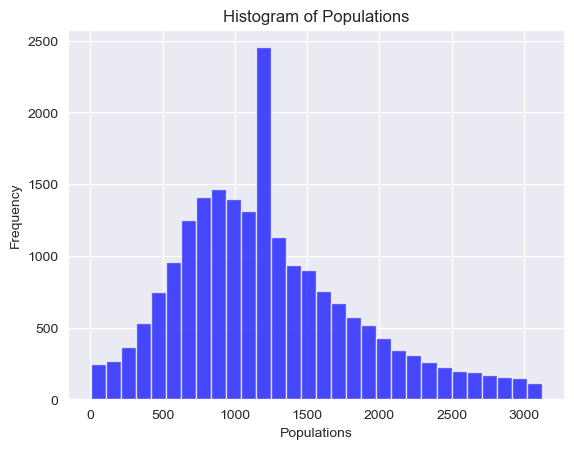

In [61]:
median_value = cleaned_df['population'].median()  # calculating the median
checkpoint4_df.loc[population_outliers, 'population'] = median_value  # impute the outliers with median

# distribution of "population" feature
# plotting histogram plot
plt.hist(checkpoint4_df['population'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Populations')
plt.ylabel('Frequency')
plt.title('Histogram of Populations')
plt.show()

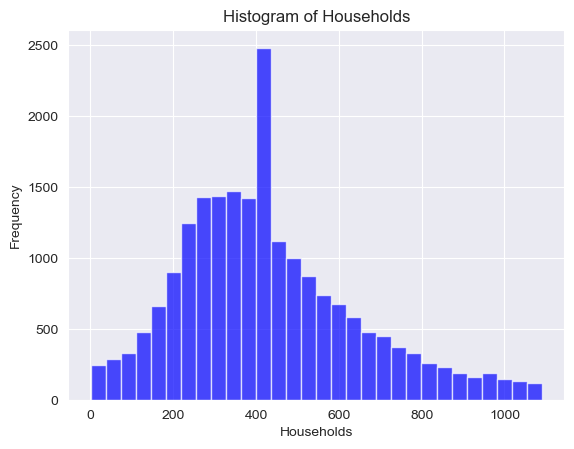

In [62]:
median_value = cleaned_df['households'].median()  # calculating the median
checkpoint4_df.loc[households_outliers, 'households'] = median_value  # impute the outliers with median

#distribution of "households" feature
# plotting histogram plot
plt.hist(checkpoint4_df['households'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Households')
plt.ylabel('Frequency')
plt.title('Histogram of Households')
plt.show()

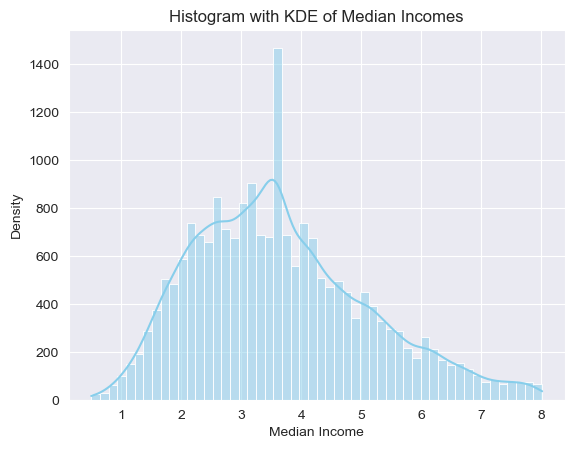

In [63]:
median_value = cleaned_df['median_income'].median()  # calculating the median
checkpoint4_df.loc[median_income_outliers, 'median_income'] = median_value  # impute the outliers with median

# Distribution of "median_income" feature
# plotting kde graph using seaborn
sns.histplot(checkpoint4_df['median_income'], kde=True, color='skyblue')
plt.title('Histogram with KDE of Median Incomes')
plt.xlabel('Median Income')
plt.ylabel('Density')
plt.show()

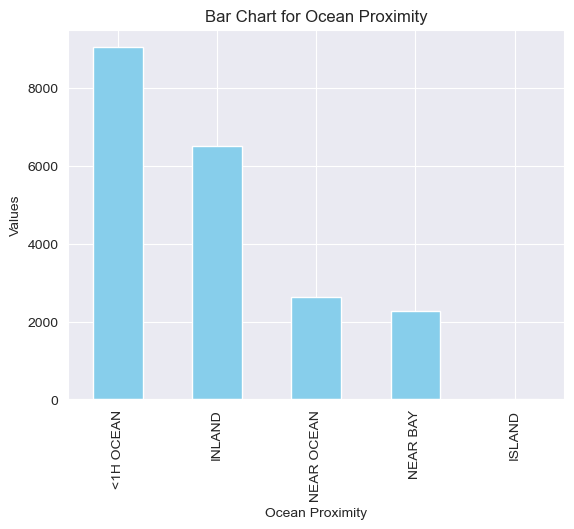

In [64]:
#mode imputation for categorical values
mode_value = cleaned_df['ocean_proximity'].mode()[0]
checkpoint4_df['ocean_proximity'] = checkpoint4_df['ocean_proximity'].fillna(mode_value)

#distribution of "ocean proximity" feature

# how many occurrences of each category
category_counts = checkpoint4_df['ocean_proximity'].value_counts()

# plotting a bar chart
category_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart for Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Values')
plt.show()

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [65]:
enc = OrdinalEncoder() # create an OrdinalEncoder
cleaned_df['ocean_proximity'] = enc.fit_transform(cleaned_df[['ocean_proximity']]) # the categorical data in the dataset is now a numerical data.
# the data is now ready to be used in a model

/var/folders/tq/7x5ljd6n3pzc8_ry52h8xszw0000gn/T/ipykernel_2992/867096395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['ocean_proximity'] = enc.fit_transform(cleaned_df[['ocean_proximity']]) # the categorical data in the dataset is now a numerical data.


## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split." (8 Pts)

You  cannot use scikit-learn's shuffle.

In [66]:
def shuffle(df):
    df = df.sample(frac=1) # simply selecting all the data as a sample(effectively shuffling the dataset)
    return df

In [67]:
def custom_train_test_split(df, target_column, test_ratio=0.3, random_state=None):
    if random_state is not None:
        df = df.sample(frac=1, random_state=random_state)  # shuffle the DataFrame with a specific seed, it ensures that every time split is called
                                                           # it will have the same train and test sets.
    
    num_samples = len(df) # num_samples is the number of samples in the dataset 
    num_test_samples = int(test_ratio * num_samples) # num_test_samples is the number of samples of test_set
    
    train_set = df.iloc[num_test_samples:] # train_set is the slice of the dataset starting from the end of the test_set
    test_set = df.iloc[:num_test_samples] # test_set is the slice of the dataset until num_test_samples
    
    X_train = train_set.drop(columns=[target_column])
    y_train = train_set[target_column]

    X_test = test_set.drop(columns=[target_column])
    y_test = test_set[target_column]

    return X_train, X_test, y_train, y_test  

In [68]:
# use of functions
shuffled_data = shuffle(cleaned_df)
X_train, X_test, y_train, y_test = custom_train_test_split(shuffled_data, "median_house_value", 0.3, 42)

# 2. REGRESSION (50 Pts)
* Target value: median_house_value
* Predictors: The rest

## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:"
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Predict the test set and calculate the MSE value for each k. Plot the MSE vs k curve to decide on the optimal k. Additionally, report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?

You can use scikit-learn's KNeighborsRegressor.

In [69]:
import sklearn

# Original Dataset

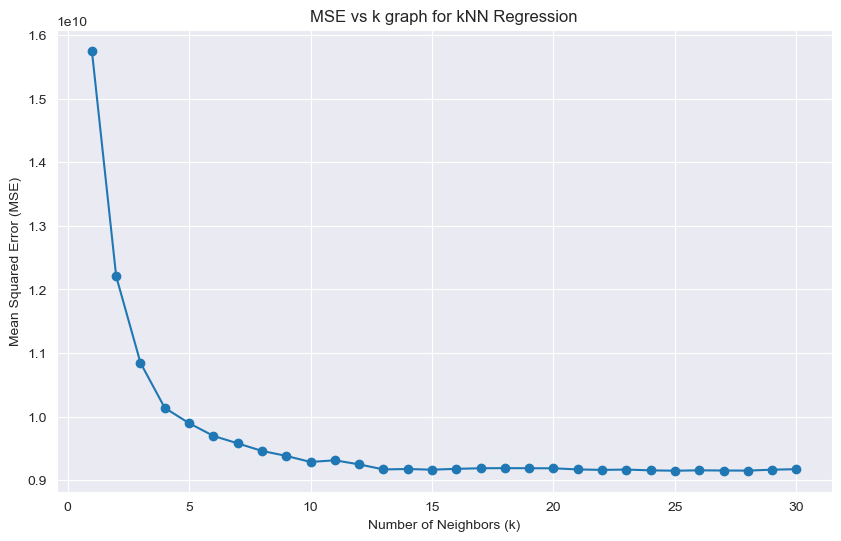

25
9150661253.485249


In [70]:
shuffled_cleaned_df = shuffle(cleaned_df)
X_train1, X_test1, y_train1, y_test1 = custom_train_test_split(shuffled_cleaned_df, "median_house_value", 0.3, 42)

# initialize lists for storing MSE and R-squared values
mse_values = []
r2_values = []

for k in range(1,31):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)  # starting from k=1
    
    knn_regressor.fit(X_train1, y_train1) # fit the model on the training data
    
    y_pred = knn_regressor.predict(X_test1) # Make predictions on the test set
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test1, y_pred) # y_test1 is the actual data, y_pred is the predicted data
    r2 = r2_score(y_test1, y_pred)
    
    # Append values to the lists
    mse_values.append(mse)
    r2_values.append(r2)

# Plot MSE vs k curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), mse_values, marker='o')
plt.title('MSE vs k graph for kNN Regression')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# find the index of the minimum MSE value
optimal_k_index = np.argmin(mse_values)
optimal_k = optimal_k_index + 1  # Add 1 to get the actual k value
print(optimal_k)
print(min(mse_values))

# Outlier Removed

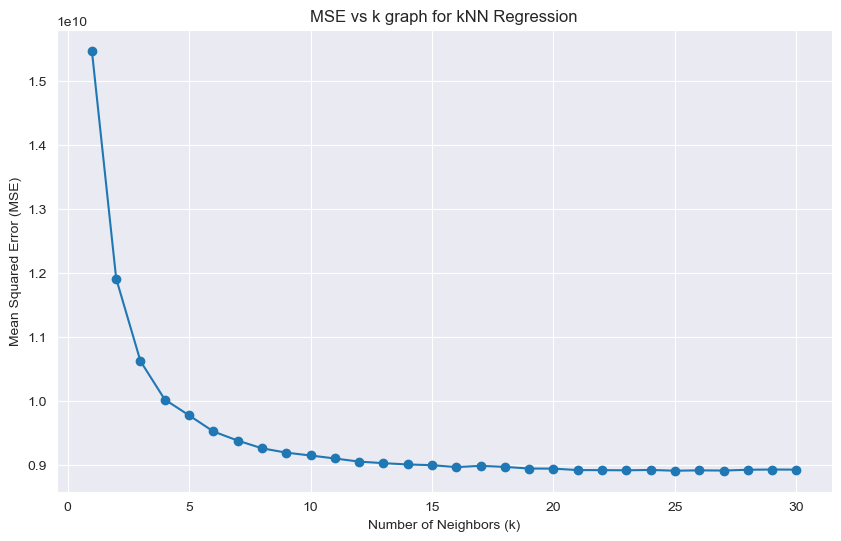

25
8907536783.933195


In [71]:
enc = OrdinalEncoder() # create an OrdinalEncoder
checkpoint2_df['ocean_proximity'] = enc.fit_transform(checkpoint2_df[['ocean_proximity']])# encoding categorical values

shuffled_checkpoint2_df = shuffle(checkpoint2_df)
X_train2, X_test2, y_train2, y_test2 = custom_train_test_split(shuffled_checkpoint2_df, "median_house_value", 0.3, 42)

# initialize lists for storing MSE and R-squared values
mse_values = []
r2_values = []

for k in range(1,31):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)  # starting from k=1
    
    knn_regressor.fit(X_train2, y_train2) # fit the model on the training data
    
    y_pred = knn_regressor.predict(X_test2) # Make predictions on the test set
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test2, y_pred) # y_test2 is the actual data, y_pred is the predicted data
    r2 = r2_score(y_test2, y_pred)
    
    # Append values to the lists
    mse_values.append(mse)
    r2_values.append(r2)

# Plot MSE vs k curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), mse_values, marker='o')
plt.title('MSE vs k graph for kNN Regression')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# find the index of the minimum MSE value
optimal_k_index = np.argmin(mse_values)
optimal_k = optimal_k_index + 1  # Add 1 to get the actual k value
print(optimal_k)
print(min(mse_values))

# Mean-Imputed

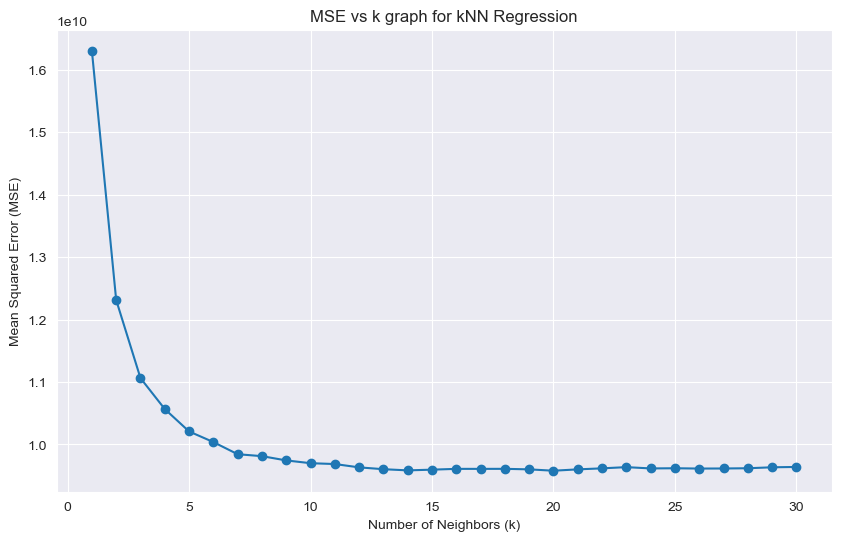

20
9578105384.376543


In [72]:
enc = OrdinalEncoder() # create an OrdinalEncoder
checkpoint3_df['ocean_proximity'] = enc.fit_transform(checkpoint3_df[['ocean_proximity']])# encoding categorical values

shuffled_checkpoint3_df = shuffle(checkpoint3_df)
X_train3, X_test3, y_train3, y_test3 = custom_train_test_split(shuffled_checkpoint3_df, "median_house_value", 0.3, 42)

# initialize lists for storing MSE and R-squared values
mse_values = []
r2_values = []

for k in range(1,31):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)  # starting from k=1
    
    knn_regressor.fit(X_train3, y_train3) # fit the model on the training data
    
    y_pred = knn_regressor.predict(X_test3) # Make predictions on the test set
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test3, y_pred) # y_test3 is the actual data, y_pred is the predicted data
    r2 = r2_score(y_test3, y_pred)
    
    # Append values to the lists
    mse_values.append(mse)
    r2_values.append(r2)

# Plot MSE vs k curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), mse_values, marker='o')
plt.title('MSE vs k graph for kNN Regression')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# find the index of the minimum MSE value
optimal_k_index = np.argmin(mse_values)
optimal_k = optimal_k_index + 1  # Add 1 to get the actual k value
print(optimal_k)
print(min(mse_values))

# Median-Imputed

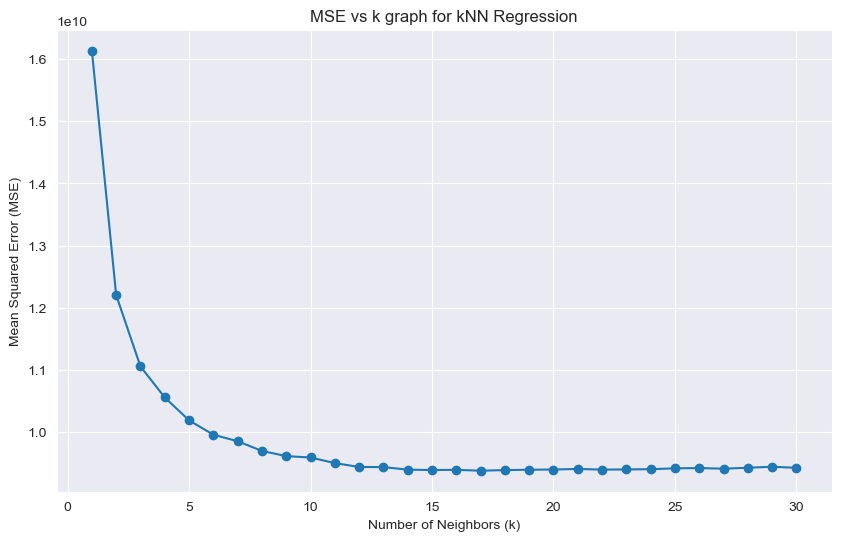

17
9375337077.120052


In [73]:
enc = OrdinalEncoder() # create an OrdinalEncoder
checkpoint4_df['ocean_proximity'] = enc.fit_transform(checkpoint4_df[['ocean_proximity']])# encoding categorical values

shuffled_checkpoint4_df = shuffle(checkpoint4_df)
X_train4, X_test4, y_train4, y_test4 = custom_train_test_split(shuffled_checkpoint4_df, "median_house_value", 0.3, 42)

# initialize lists for storing MSE and R-squared values
mse_values = []
r2_values = []

for k in range(1,31):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)  # starting from k=1
    
    knn_regressor.fit(X_train4, y_train4) # fit the model on the training data
    
    y_pred = knn_regressor.predict(X_test4) # Make predictions on the test set
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test4, y_pred) # y_test2 is the actual data, y_pred is the predicted data
    r2 = r2_score(y_test4, y_pred)
    
    # Append values to the lists
    mse_values.append(mse)
    r2_values.append(r2)

# Plot MSE vs k curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), mse_values, marker='o')
plt.title('MSE vs k graph for kNN Regression')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# find the index of the minimum MSE value
optimal_k_index = np.argmin(mse_values)
optimal_k = optimal_k_index + 1  # Add 1 to get the actual k value
print(optimal_k)
print(min(mse_values))

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following:
    * Split the data into train and test sets
    * Fit a linear regression model to train data. Predict the test set and calculate the MSE value.

# Original Dataset

In [74]:
enc = OrdinalEncoder() # create an OrdinalEncoder
checkpoint1_df['ocean_proximity'] = enc.fit_transform(checkpoint1_df[['ocean_proximity']])# encoding categorical values

# shuffle the dataset
shuffled_checkpoint1_df = shuffle(checkpoint1_df)
# split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = custom_train_test_split(shuffled_checkpoint1_df, "median_house_value", test_ratio=0.3, random_state=42)

lin_reg_model = LinearRegression()# Initialize the Linear Regression model

lin_reg_model.fit(X_train1, y_train1)# Fit the model on the training data

y_pred = lin_reg_model.predict(X_test1)# Make predictions on the test set

mse = mean_squared_error(y_test1, y_pred)# Calculate the Mean Squared Error (MSE)

print('Mean Squared Error: {}'.format(mse))

Mean Squared Error: 4730659481.64463


# Outlier Removal

In [75]:
enc = OrdinalEncoder() # create an OrdinalEncoder
checkpoint2_df['ocean_proximity'] = enc.fit_transform(checkpoint2_df[['ocean_proximity']])# encoding categorical values

# shuffle the dataset
shuffled_checkpoint2_df = shuffle(checkpoint2_df)
# split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = custom_train_test_split(shuffled_checkpoint2_df, "median_house_value", test_ratio=0.3, random_state=42)

lin_reg_model = LinearRegression()# Initialize the Linear Regression model

lin_reg_model.fit(X_train2, y_train2)# Fit the model on the training data

y_pred = lin_reg_model.predict(X_test2)# Make predictions on the test set

mse = mean_squared_error(y_test2, y_pred)# Calculate the Mean Squared Error (MSE)

print('Mean Squared Error: {}'.format(mse))

Mean Squared Error: 4317119280.20213


# Mean-Imputation

In [76]:
enc = OrdinalEncoder() # create an OrdinalEncoder
checkpoint3_df['ocean_proximity'] = enc.fit_transform(checkpoint3_df[['ocean_proximity']])# encoding categorical values

# shuffle the dataset
shuffled_checkpoint3_df = shuffle(checkpoint3_df)
# split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = custom_train_test_split(shuffled_checkpoint3_df, "median_house_value", test_ratio=0.3, random_state=42)

lin_reg_model = LinearRegression()# Initialize the Linear Regression model

lin_reg_model.fit(X_train3, y_train3)# Fit the model on the training data

y_pred = lin_reg_model.predict(X_test3)# Make predictions on the test set

mse = mean_squared_error(y_test3, y_pred)# Calculate the Mean Squared Error (MSE)

print('Mean Squared Error: {}'.format(mse))

Mean Squared Error: 6573716709.244251


# Median-Imputation

In [77]:
enc = OrdinalEncoder() # create an OrdinalEncoder
checkpoint4_df['ocean_proximity'] = enc.fit_transform(checkpoint4_df[['ocean_proximity']])# encoding categorical values

# shuffle the dataset
shuffled_checkpoint4_df = shuffle(checkpoint4_df)
# split the data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = custom_train_test_split(shuffled_checkpoint4_df, "median_house_value", test_ratio=0.3, random_state=42)

lin_reg_model = LinearRegression()# Initialize the Linear Regression model

lin_reg_model.fit(X_train4, y_train4)# Fit the model on the training data

y_pred = lin_reg_model.predict(X_test4)# Make predictions on the test set

mse = mean_squared_error(y_test4, y_pred)# Calculate the Mean Squared Error (MSE)

print('Mean Squared Error: {}'.format(mse))

Mean Squared Error: 6825439177.633113


## 2.3. Compare the Regression Methods (10 Pts)

Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.). Discuss the strengths and limitations of each model based on your results

\< double click and insert answer here \>
1-original data
    kNN regression: it works better than linear regression when there is non-linear, more complex, relationship between features and the target variable
    linear regression: it works well when there is a linear correlation between the predictors and target variable
    
2-outlier removal
    kNN regression: it is less sensitive to outliers than linear regression.
    linear regression: since linear regression is more sensitive to the outliers, when outliers removed, it performed better results
    
3-mean imputation
    kNN regression: missing values don't effectively contribute the distance between data points
    linear regression: may not perform well if the missing data make the distribution biased
    
4-median imputation
    kNN regression: similar to the mean imputation.
    linear regression: it works better if the data distribution is close to linear
    
Overall Comments:
-Linear regression is more sensitive to outliers than the kNN regression.
-If there are non-linear distributions, the kNN performs better.(but in our case I think linear regression performed better since 
the data is distributed like linear)
-Linear Regression performs better results in outlier removal dataset since the outliers that effects the model are removed
-We can say that kNN regression is more flexible than the linear regression since we can select a k value within a possible range.

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **MAKE USE OF THEM RESPONSIBLY**. That is, you can utilize them to enhance understanding and support your original work, **not to replace it**. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.

# REFERENCES
[1] Nugent, C. (n.d.). California Housing Prices [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices